# Предсказание атрибутов узлов с использованием графовых нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Курс "Машинное обучение на графах", Лекции 4-5 "Графовые нейронные сети"
* Документация:
    * https://docs.dgl.ai/en/latest/tutorials/blitz/2_dglgraph.html
    * https://docs.dgl.ai/en/latest/tutorials/blitz/1_introduction.html
    * https://docs.dgl.ai/generated/dgl.nn.pytorch.conv.GraphConv.html#dgl.nn.pytorch.conv.GraphConv
    * https://docs.dgl.ai/api/python/dgl.data.html

## Вопросы для совместного обсуждения

1\. Обсудите основные шаги для решения задачи предсказания атрибутов узлов при помощи графовых нейронных сетей.

In [1]:
# pip install utils

In [1]:
# импорты (для всех последующих примеров):
import urllib.request
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import dgl
import dgl.function as fn
import dgl.data
import dgl.nn as gnn

import utils


In [3]:
# import torch; print(torch.__version__)

In [4]:
# from utils import train_cora_node_classification

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите граф `CoraGraphDataset` из `dgl.data`. Решите задачу классификации узлов графа, используя только полносвязные слои `torch.nn.Linear` (создайте модель из двух слоев). Обратите внимание, что настройка весов модели должна проводиться только на основе примеров из обучающей выборки. Посчитайте и выведите на экран значение `accuracy` на тестовой выборке.

- [ ] Проверено на семинаре

In [22]:
dataset = dgl.data.CoraGraphDataset()
G = dataset[0]

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [23]:
class model(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear1 = nn.Linear( n_inputs, 10
                                )
        self.linear2 = nn.Linear(10, n_outputs)

    def forward(self, x):
            return torch.relu(self.linear2(self.linear1(x)))

In [24]:
test_mask = G.ndata['train_mask']
val_mask = G.ndata['val_mask']
train_mask = G.ndata['test_mask']

In [25]:
n_input = G.ndata['feat'].shape[1]
n_out = dataset.num_classes

In [26]:
n_input, n_out

(1433, 7)

In [27]:
model = model(n_input, n_out)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 500

for epoch in range(num_epochs):
    logits = model(G.ndata['feat'])
    
    loss = nn.CrossEntropyLoss()(logits, G.ndata['label'][train_mask])
    print(epoch, loss)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

model.eval()
with torch.no_grad():
    pred = model(G.ndata['feat'][test_mask])
    loss_test = nn.CrossEntropyLoss()(pred, G.ndata['label'][test_mask])
accuracy = (pred.argmax(dim=1) == G.ndata['label'][test_mask]).float().mean()
print(f"Accuracy on test set: {accuracy.item()}")

0 tensor(1.9617, grad_fn=<NllLossBackward0>)
1 tensor(1.9560, grad_fn=<NllLossBackward0>)
2 tensor(1.9502, grad_fn=<NllLossBackward0>)
3 tensor(1.9440, grad_fn=<NllLossBackward0>)
4 tensor(1.9385, grad_fn=<NllLossBackward0>)
5 tensor(1.9347, grad_fn=<NllLossBackward0>)
6 tensor(1.9304, grad_fn=<NllLossBackward0>)
7 tensor(1.9269, grad_fn=<NllLossBackward0>)
8 tensor(1.9241, grad_fn=<NllLossBackward0>)
9 tensor(1.9200, grad_fn=<NllLossBackward0>)
10 tensor(1.9157, grad_fn=<NllLossBackward0>)
11 tensor(1.9115, grad_fn=<NllLossBackward0>)
12 tensor(1.9068, grad_fn=<NllLossBackward0>)
13 tensor(1.9020, grad_fn=<NllLossBackward0>)
14 tensor(1.8970, grad_fn=<NllLossBackward0>)
15 tensor(1.8920, grad_fn=<NllLossBackward0>)
16 tensor(1.8868, grad_fn=<NllLossBackward0>)
17 tensor(1.8816, grad_fn=<NllLossBackward0>)
18 tensor(1.8762, grad_fn=<NllLossBackward0>)
19 tensor(1.8705, grad_fn=<NllLossBackward0>)
20 tensor(1.8644, grad_fn=<NllLossBackward0>)
21 tensor(1.8581, grad_fn=<NllLossBackward0>

178 tensor(1.0199, grad_fn=<NllLossBackward0>)
179 tensor(1.0195, grad_fn=<NllLossBackward0>)
180 tensor(1.0191, grad_fn=<NllLossBackward0>)
181 tensor(1.0187, grad_fn=<NllLossBackward0>)
182 tensor(1.0184, grad_fn=<NllLossBackward0>)
183 tensor(1.0182, grad_fn=<NllLossBackward0>)
184 tensor(1.0178, grad_fn=<NllLossBackward0>)
185 tensor(1.0175, grad_fn=<NllLossBackward0>)
186 tensor(1.0172, grad_fn=<NllLossBackward0>)
187 tensor(1.0169, grad_fn=<NllLossBackward0>)
188 tensor(1.0166, grad_fn=<NllLossBackward0>)
189 tensor(1.0164, grad_fn=<NllLossBackward0>)
190 tensor(1.0161, grad_fn=<NllLossBackward0>)
191 tensor(1.0159, grad_fn=<NllLossBackward0>)
192 tensor(1.0156, grad_fn=<NllLossBackward0>)
193 tensor(1.0154, grad_fn=<NllLossBackward0>)
194 tensor(1.0151, grad_fn=<NllLossBackward0>)
195 tensor(1.0149, grad_fn=<NllLossBackward0>)
196 tensor(1.0147, grad_fn=<NllLossBackward0>)
197 tensor(1.0145, grad_fn=<NllLossBackward0>)
198 tensor(1.0143, grad_fn=<NllLossBackward0>)
199 tensor(1.

395 tensor(0.3926, grad_fn=<NllLossBackward0>)
396 tensor(0.3924, grad_fn=<NllLossBackward0>)
397 tensor(0.3922, grad_fn=<NllLossBackward0>)
398 tensor(0.3920, grad_fn=<NllLossBackward0>)
399 tensor(0.3919, grad_fn=<NllLossBackward0>)
400 tensor(0.3917, grad_fn=<NllLossBackward0>)
401 tensor(0.3915, grad_fn=<NllLossBackward0>)
402 tensor(0.3914, grad_fn=<NllLossBackward0>)
403 tensor(0.3912, grad_fn=<NllLossBackward0>)
404 tensor(0.3911, grad_fn=<NllLossBackward0>)
405 tensor(0.3910, grad_fn=<NllLossBackward0>)
406 tensor(0.3908, grad_fn=<NllLossBackward0>)
407 tensor(0.3907, grad_fn=<NllLossBackward0>)
408 tensor(0.3905, grad_fn=<NllLossBackward0>)
409 tensor(0.3904, grad_fn=<NllLossBackward0>)
410 tensor(0.3903, grad_fn=<NllLossBackward0>)
411 tensor(0.3902, grad_fn=<NllLossBackward0>)
412 tensor(0.3901, grad_fn=<NllLossBackward0>)
413 tensor(0.3899, grad_fn=<NllLossBackward0>)
414 tensor(0.3898, grad_fn=<NllLossBackward0>)
415 tensor(0.3897, grad_fn=<NllLossBackward0>)
416 tensor(0.

<p class="task" id="2"></p>

2\. Решите задачу 1, используя два слоя `dgl.nn.GraphConv` вместо полносвязных слоев `torch.nn.Linear`.

- [ ] Проверено на семинаре

In [38]:
class model2(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        self.conv1 = gnn.GraphConv(n_input, n_hidden)
        self.conv2 = gnn.GraphConv(n_hidden, n_output)
    
    def forward(self, G, in_features):
        out = F.relu(self.conv1(G, in_features))
        out = self.conv2(G, out)
        return out

In [39]:
n_input = G.ndata['feat'].shape[1]
n_hidden = 16
n_out = dataset.num_classes

model = model2(n_input, n_hidden, n_out)

In [40]:
features = G.ndata['feat']
labels = G.ndata['label']
test_mask = G.ndata['train_mask']
val_mask = G.ndata['val_mask']
train_mask = G.ndata['test_mask']

In [41]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 500

for epoch in range(num_epochs):
    logits = model(G, features)
    
    loss = nn.CrossEntropyLoss()(logits[train_mask], G.ndata['label'][train_mask])
    print(epoch, loss)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

model.eval()
with torch.no_grad():
    pred = model(G, features)
    loss_test = nn.CrossEntropyLoss()(pred[test_mask], G.ndata['label'][test_mask])
accuracy = (pred[test_mask].argmax(dim=1) == G.ndata['label'][test_mask]).float().mean()
print(f"Accuracy on test set: {accuracy.item()}")

0 tensor(1.9471, grad_fn=<NllLossBackward0>)
1 tensor(1.9378, grad_fn=<NllLossBackward0>)
2 tensor(1.9288, grad_fn=<NllLossBackward0>)
3 tensor(1.9186, grad_fn=<NllLossBackward0>)
4 tensor(1.9073, grad_fn=<NllLossBackward0>)
5 tensor(1.8961, grad_fn=<NllLossBackward0>)
6 tensor(1.8840, grad_fn=<NllLossBackward0>)
7 tensor(1.8714, grad_fn=<NllLossBackward0>)
8 tensor(1.8587, grad_fn=<NllLossBackward0>)
9 tensor(1.8452, grad_fn=<NllLossBackward0>)
10 tensor(1.8313, grad_fn=<NllLossBackward0>)
11 tensor(1.8171, grad_fn=<NllLossBackward0>)
12 tensor(1.8019, grad_fn=<NllLossBackward0>)
13 tensor(1.7872, grad_fn=<NllLossBackward0>)
14 tensor(1.7731, grad_fn=<NllLossBackward0>)
15 tensor(1.7586, grad_fn=<NllLossBackward0>)
16 tensor(1.7436, grad_fn=<NllLossBackward0>)
17 tensor(1.7282, grad_fn=<NllLossBackward0>)
18 tensor(1.7128, grad_fn=<NllLossBackward0>)
19 tensor(1.6973, grad_fn=<NllLossBackward0>)
20 tensor(1.6818, grad_fn=<NllLossBackward0>)
21 tensor(1.6660, grad_fn=<NllLossBackward0>

191 tensor(0.0959, grad_fn=<NllLossBackward0>)
192 tensor(0.0951, grad_fn=<NllLossBackward0>)
193 tensor(0.0942, grad_fn=<NllLossBackward0>)
194 tensor(0.0934, grad_fn=<NllLossBackward0>)
195 tensor(0.0925, grad_fn=<NllLossBackward0>)
196 tensor(0.0917, grad_fn=<NllLossBackward0>)
197 tensor(0.0909, grad_fn=<NllLossBackward0>)
198 tensor(0.0901, grad_fn=<NllLossBackward0>)
199 tensor(0.0893, grad_fn=<NllLossBackward0>)
200 tensor(0.0885, grad_fn=<NllLossBackward0>)
201 tensor(0.0877, grad_fn=<NllLossBackward0>)
202 tensor(0.0870, grad_fn=<NllLossBackward0>)
203 tensor(0.0862, grad_fn=<NllLossBackward0>)
204 tensor(0.0855, grad_fn=<NllLossBackward0>)
205 tensor(0.0848, grad_fn=<NllLossBackward0>)
206 tensor(0.0841, grad_fn=<NllLossBackward0>)
207 tensor(0.0834, grad_fn=<NllLossBackward0>)
208 tensor(0.0827, grad_fn=<NllLossBackward0>)
209 tensor(0.0820, grad_fn=<NllLossBackward0>)
210 tensor(0.0813, grad_fn=<NllLossBackward0>)
211 tensor(0.0806, grad_fn=<NllLossBackward0>)
212 tensor(0.

374 tensor(0.0307, grad_fn=<NllLossBackward0>)
375 tensor(0.0306, grad_fn=<NllLossBackward0>)
376 tensor(0.0305, grad_fn=<NllLossBackward0>)
377 tensor(0.0303, grad_fn=<NllLossBackward0>)
378 tensor(0.0302, grad_fn=<NllLossBackward0>)
379 tensor(0.0301, grad_fn=<NllLossBackward0>)
380 tensor(0.0299, grad_fn=<NllLossBackward0>)
381 tensor(0.0298, grad_fn=<NllLossBackward0>)
382 tensor(0.0297, grad_fn=<NllLossBackward0>)
383 tensor(0.0296, grad_fn=<NllLossBackward0>)
384 tensor(0.0294, grad_fn=<NllLossBackward0>)
385 tensor(0.0293, grad_fn=<NllLossBackward0>)
386 tensor(0.0292, grad_fn=<NllLossBackward0>)
387 tensor(0.0291, grad_fn=<NllLossBackward0>)
388 tensor(0.0289, grad_fn=<NllLossBackward0>)
389 tensor(0.0288, grad_fn=<NllLossBackward0>)
390 tensor(0.0287, grad_fn=<NllLossBackward0>)
391 tensor(0.0286, grad_fn=<NllLossBackward0>)
392 tensor(0.0285, grad_fn=<NllLossBackward0>)
393 tensor(0.0284, grad_fn=<NllLossBackward0>)
394 tensor(0.0282, grad_fn=<NllLossBackward0>)
395 tensor(0.

<p class="task" id="3"></p>

3\. Воспользовавшись необученной моделью из предыдущего задания, получите прогнозы для всех узлов графа. Уменьшите размерность полученных прогнозов до 2 при помощи алгоритма t-SNE (`sklearn.manifold.TSNE`). Визуализируйте точки на плоскости, используя полученные значения в качестве координат. Раскрасьте точки в цвета, соответствующим меткам узлов. 

Повторите данную процедуру, используя обученную модель. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

In [12]:
# pip install scikit-learn

In [31]:
import sklearn.manifold
import matplotlib.pyplot as plt

In [32]:
c={0: 'red', 1:'green', 2: 'pink', 3:'blue', 4:'orange', 5:'black', 6:'yellow'}
col=[]
for i in torch.argmax(pred, dim=1):
    col.append(c[i.item()])

In [33]:
model = model2(n_input, n_hidden, n_out)

In [34]:
pred = model(G, features)

In [35]:
pred_2 =sklearn.manifold.TSNE(n_components=2).fit_transform(pred.detach().numpy())

C:\Users\Elena\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Elena\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


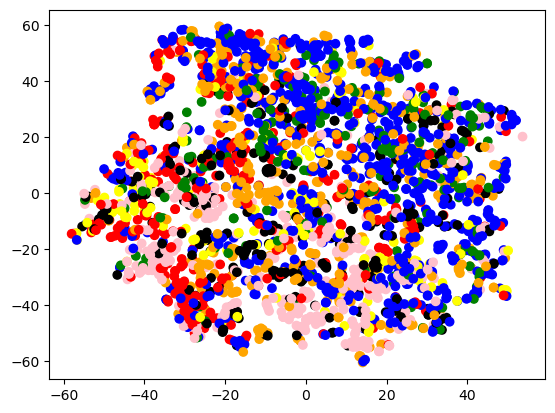

In [36]:
plt.scatter(pred_2[:, 0], pred_2[:, 1], color=col)

In [41]:
c={0: 'red', 1:'green', 2: 'pink', 3:'blue', 4:'orange', 5:'black', 6:'yellow'}
col=[]
for i in torch.argmax(pred, dim=1):
    col.append(c[i.item()])

C:\Users\Elena\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Elena\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


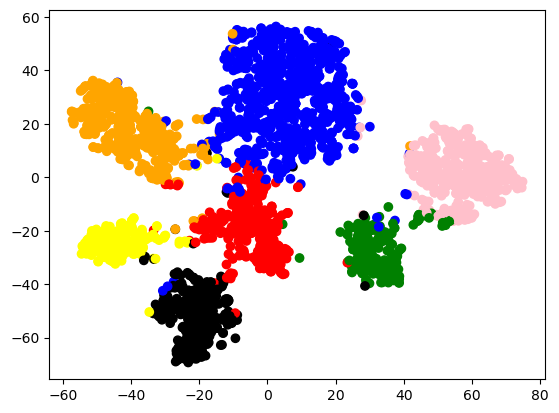

In [42]:
model = model

pred = model(G, features)

pred_2 =sklearn.manifold.TSNE(n_components=2).fit_transform(pred.detach().numpy())

plt.scatter(pred_2[:, 0], pred_2[:, 1], color=col)

<p class="task" id="4"></p>

4\.  Предыдущие решения не используют узлы, находящиеся в валидационном множестве. Решите задачу 2, используя валидационное множество для выполнения ранней остановки.

- [ ] Проверено на семинаре

In [119]:
def validation(model, loss_function):

    model.eval()

    output = model(G, features)
    loss = loss_function(logits[val_mask], G.ndata['label'][val_mask])

    return loss

In [125]:
n_input = G.ndata['feat'].shape[1]
n_hidden = 16
n_out = dataset.num_classes

model = model2(n_input, n_hidden, n_out)

In [126]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 500
patience=5
trigger_times = 0
last_loss=1.9

for epoch in range(num_epochs):
    logits = model(G, features)
    
    loss = nn.CrossEntropyLoss()(logits[train_mask], G.ndata['label'][train_mask])
#     last_loss=loss
    print(epoch, loss)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    current_loss = validation(model,  nn.CrossEntropyLoss())
    print('The Current Loss:', current_loss)
#     print('!!!!!!', current_loss - last_loss)
    if (current_loss - last_loss) > 0.0002:
            trigger_times += 1
            last_loss = current_loss
            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                break

    else:
            print('trigger times: 0')
            trigger_times = 0
            last_loss = current_loss



model.eval()
with torch.no_grad():
    pred = model(G, features)
    loss_test = nn.CrossEntropyLoss()(pred[test_mask], G.ndata['label'][test_mask])
accuracy = (pred[test_mask].argmax(dim=1) == G.ndata['label'][test_mask]).float().mean()
print(f"Accuracy on test set: {accuracy.item()}")





0 tensor(1.9460, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(1.9460, grad_fn=<NllLossBackward0>)
!!!!!! tensor(0.0460, grad_fn=<SubBackward0>)
1 tensor(1.9335, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(1.9333, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0127, grad_fn=<SubBackward0>)
trigger times: 0
2 tensor(1.9199, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(1.9200, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0133, grad_fn=<SubBackward0>)
trigger times: 0
3 tensor(1.9050, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(1.9054, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0146, grad_fn=<SubBackward0>)
trigger times: 0
4 tensor(1.8898, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(1.8907, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0147, grad_fn=<SubBackward0>)
trigger times: 0
5 tensor(1.8746, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(1.8761, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0145, grad_fn=<SubBackward0>)
trigger times: 

57 tensor(0.8675, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.9866, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0165, grad_fn=<SubBackward0>)
trigger times: 0
58 tensor(0.8480, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.9705, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0161, grad_fn=<SubBackward0>)
trigger times: 0
59 tensor(0.8287, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.9547, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0158, grad_fn=<SubBackward0>)
trigger times: 0
60 tensor(0.8098, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.9393, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0154, grad_fn=<SubBackward0>)
trigger times: 0
61 tensor(0.7912, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.9243, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0150, grad_fn=<SubBackward0>)
trigger times: 0
62 tensor(0.7729, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.9097, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0146, grad_fn=<SubBac

The Current Loss: tensor(0.5804, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0024, grad_fn=<SubBackward0>)
trigger times: 0
108 tensor(0.2912, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5781, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0023, grad_fn=<SubBackward0>)
trigger times: 0
109 tensor(0.2865, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5759, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0022, grad_fn=<SubBackward0>)
trigger times: 0
110 tensor(0.2819, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5738, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0021, grad_fn=<SubBackward0>)
trigger times: 0
111 tensor(0.2775, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5718, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0020, grad_fn=<SubBackward0>)
trigger times: 0
112 tensor(0.2732, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5700, grad_fn=<NllLossBackward0>)
!!!!!! tensor(-0.0019, grad_fn=<SubBackward0>)
trigger times: 0
113 tensor(0.26

155 tensor(0.1610, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5427, grad_fn=<NllLossBackward0>)
!!!!!! tensor(2.5749e-05, grad_fn=<SubBackward0>)
trigger times: 0
156 tensor(0.1595, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5427, grad_fn=<NllLossBackward0>)
!!!!!! tensor(5.0068e-05, grad_fn=<SubBackward0>)
trigger times: 0
157 tensor(0.1579, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5428, grad_fn=<NllLossBackward0>)
!!!!!! tensor(6.6936e-05, grad_fn=<SubBackward0>)
trigger times: 0
158 tensor(0.1564, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5429, grad_fn=<NllLossBackward0>)
!!!!!! tensor(7.8499e-05, grad_fn=<SubBackward0>)
trigger times: 0
159 tensor(0.1548, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5430, grad_fn=<NllLossBackward0>)
!!!!!! tensor(9.4771e-05, grad_fn=<SubBackward0>)
trigger times: 0
160 tensor(0.1534, grad_fn=<NllLossBackward0>)
The Current Loss: tensor(0.5431, grad_fn=<NllLossBackward0>)
!!!!!! tensor(0.0

<p class="task" id="5"></p>

5\. Повторите решение задачи 4, сравнив несколько различных слоев:
* GraphConv
* SAGEConv (укажите `aggregator_type="mean"`)
* GATConv (выберите для первого слоя `num_heads > 1`)

Выведите результат в виде таблицы:

| Модель    | Loss на обучении | Acc на обучении | Acc на тесте | Кол-во эпох до ранней остановки |
|-----------|------------------|-----------------|--------------|-------------|
| GraphConv |                  |                 |              |             |
| SAGEConv  |                  |                 |              |             |
| GATConv   |                  |                 |              |             |


- [ ] Проверено на семинаре

In [127]:
class GraphConv(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        self.conv1 = gnn.GraphConv(n_input, n_hidden)
        self.conv2 = gnn.GraphConv(n_hidden, n_output)
    
    def forward(self, G, in_features):
        out = F.relu(self.conv1(G, in_features))
        out = self.conv2(G, out)
        return out

In [128]:
class SAGEConv(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        self.conv1 = gnn.SAGEConv(n_input, n_hidden, aggregator_type="mean")
        self.conv2 = gnn.SAGEConv(n_hidden, n_output, aggregator_type="mean")
    
    def forward(self, G, in_features):
        out = F.relu(self.conv1(G, in_features))
        out = self.conv2(G, out)
        return out

In [139]:
class GATConv(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        self.conv1 = gnn.GATConv(n_input, n_hidden, num_heads = 3)
        self.conv2 = gnn.GATConv(n_hidden, n_output, num_heads = 3 )
    
    def forward(self, G, in_features):
        out = F.relu(self.conv1(G, in_features))
        out = self.conv2(G, out)
        return out

In [140]:
n_input = G.ndata['feat'].shape[1]
n_hidden = 16
n_out = dataset.num_classes

model = GraphConv(n_input, n_hidden, n_out)

In [141]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 1000
patience=5
trigger_times=0
last_loss=0
for epoch in range(num_epochs):
    logits = model(G, features)
    
    loss = nn.CrossEntropyLoss()(logits[train_mask], G.ndata['label'][train_mask])
#     last_loss=loss
    print(epoch, loss)
    print('acc', (logits[train_mask].argmax(dim=1) == G.ndata['label'][train_mask]).float().mean())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    current_loss = validation(model,  nn.CrossEntropyLoss())
    print('The Current Loss:', current_loss)
    print(trigger_times )

    if (current_loss - last_loss) > 0.1:
            trigger_times += 1
            last_loss=current_loss
            if trigger_times >= patience:
                print(trigger_times )
                print('Early stopping!\nStart to test process.')
                break

    else:
            print('trigger times: 0')
            trigger_times = 0
            last_loss=current_loss


model.eval()
with torch.no_grad():
    pred = model(G, features)
    loss_test = nn.CrossEntropyLoss()(pred[test_mask], G.ndata['label'][test_mask])
accuracy = (pred[test_mask].argmax(dim=1) == G.ndata['label'][test_mask]).float().mean()
print(f"Accuracy on test set: {accuracy.item()}")





0 tensor(1.9474, grad_fn=<NllLossBackward0>)
acc tensor(0.1010)
The Current Loss: tensor(1.9473, grad_fn=<NllLossBackward0>)
0
1 tensor(1.9375, grad_fn=<NllLossBackward0>)
acc tensor(0.3190)
The Current Loss: tensor(1.9372, grad_fn=<NllLossBackward0>)
1
trigger times: 0
2 tensor(1.9283, grad_fn=<NllLossBackward0>)
acc tensor(0.3190)
The Current Loss: tensor(1.9280, grad_fn=<NllLossBackward0>)
0
trigger times: 0
3 tensor(1.9179, grad_fn=<NllLossBackward0>)
acc tensor(0.3190)
The Current Loss: tensor(1.9179, grad_fn=<NllLossBackward0>)
0
trigger times: 0
4 tensor(1.9072, grad_fn=<NllLossBackward0>)
acc tensor(0.3190)
The Current Loss: tensor(1.9075, grad_fn=<NllLossBackward0>)
0
trigger times: 0
5 tensor(1.8963, grad_fn=<NllLossBackward0>)
acc tensor(0.3190)
The Current Loss: tensor(1.8970, grad_fn=<NllLossBackward0>)
0
trigger times: 0
6 tensor(1.8848, grad_fn=<NllLossBackward0>)
acc tensor(0.3190)
The Current Loss: tensor(1.8860, grad_fn=<NllLossBackward0>)
0
trigger times: 0
7 tensor(

64 tensor(0.8573, grad_fn=<NllLossBackward0>)
acc tensor(0.8210)
The Current Loss: tensor(0.9753, grad_fn=<NllLossBackward0>)
0
trigger times: 0
65 tensor(0.8365, grad_fn=<NllLossBackward0>)
acc tensor(0.8290)
The Current Loss: tensor(0.9582, grad_fn=<NllLossBackward0>)
0
trigger times: 0
66 tensor(0.8160, grad_fn=<NllLossBackward0>)
acc tensor(0.8310)
The Current Loss: tensor(0.9415, grad_fn=<NllLossBackward0>)
0
trigger times: 0
67 tensor(0.7959, grad_fn=<NllLossBackward0>)
acc tensor(0.8360)
The Current Loss: tensor(0.9252, grad_fn=<NllLossBackward0>)
0
trigger times: 0
68 tensor(0.7761, grad_fn=<NllLossBackward0>)
acc tensor(0.8410)
The Current Loss: tensor(0.9093, grad_fn=<NllLossBackward0>)
0
trigger times: 0
69 tensor(0.7568, grad_fn=<NllLossBackward0>)
acc tensor(0.8500)
The Current Loss: tensor(0.8937, grad_fn=<NllLossBackward0>)
0
trigger times: 0
70 tensor(0.7378, grad_fn=<NllLossBackward0>)
acc tensor(0.8520)
The Current Loss: tensor(0.8786, grad_fn=<NllLossBackward0>)
0
tr

The Current Loss: tensor(0.5515, grad_fn=<NllLossBackward0>)
0
trigger times: 0
128 tensor(0.2291, grad_fn=<NllLossBackward0>)
acc tensor(0.9540)
The Current Loss: tensor(0.5508, grad_fn=<NllLossBackward0>)
0
trigger times: 0
129 tensor(0.2261, grad_fn=<NllLossBackward0>)
acc tensor(0.9540)
The Current Loss: tensor(0.5501, grad_fn=<NllLossBackward0>)
0
trigger times: 0
130 tensor(0.2232, grad_fn=<NllLossBackward0>)
acc tensor(0.9540)
The Current Loss: tensor(0.5495, grad_fn=<NllLossBackward0>)
0
trigger times: 0
131 tensor(0.2203, grad_fn=<NllLossBackward0>)
acc tensor(0.9540)
The Current Loss: tensor(0.5489, grad_fn=<NllLossBackward0>)
0
trigger times: 0
132 tensor(0.2176, grad_fn=<NllLossBackward0>)
acc tensor(0.9540)
The Current Loss: tensor(0.5484, grad_fn=<NllLossBackward0>)
0
trigger times: 0
133 tensor(0.2148, grad_fn=<NllLossBackward0>)
acc tensor(0.9550)
The Current Loss: tensor(0.5479, grad_fn=<NllLossBackward0>)
0
trigger times: 0
134 tensor(0.2122, grad_fn=<NllLossBackward0

190 tensor(0.1231, grad_fn=<NllLossBackward0>)
acc tensor(0.9810)
The Current Loss: tensor(0.5583, grad_fn=<NllLossBackward0>)
0
trigger times: 0
191 tensor(0.1221, grad_fn=<NllLossBackward0>)
acc tensor(0.9820)
The Current Loss: tensor(0.5588, grad_fn=<NllLossBackward0>)
0
trigger times: 0
192 tensor(0.1212, grad_fn=<NllLossBackward0>)
acc tensor(0.9820)
The Current Loss: tensor(0.5593, grad_fn=<NllLossBackward0>)
0
trigger times: 0
193 tensor(0.1202, grad_fn=<NllLossBackward0>)
acc tensor(0.9820)
The Current Loss: tensor(0.5597, grad_fn=<NllLossBackward0>)
0
trigger times: 0
194 tensor(0.1193, grad_fn=<NllLossBackward0>)
acc tensor(0.9830)
The Current Loss: tensor(0.5602, grad_fn=<NllLossBackward0>)
0
trigger times: 0
195 tensor(0.1183, grad_fn=<NllLossBackward0>)
acc tensor(0.9840)
The Current Loss: tensor(0.5607, grad_fn=<NllLossBackward0>)
0
trigger times: 0
196 tensor(0.1174, grad_fn=<NllLossBackward0>)
acc tensor(0.9840)
The Current Loss: tensor(0.5612, grad_fn=<NllLossBackward0

250 tensor(0.0803, grad_fn=<NllLossBackward0>)
acc tensor(0.9880)
The Current Loss: tensor(0.5919, grad_fn=<NllLossBackward0>)
0
trigger times: 0
251 tensor(0.0798, grad_fn=<NllLossBackward0>)
acc tensor(0.9880)
The Current Loss: tensor(0.5925, grad_fn=<NllLossBackward0>)
0
trigger times: 0
252 tensor(0.0793, grad_fn=<NllLossBackward0>)
acc tensor(0.9880)
The Current Loss: tensor(0.5932, grad_fn=<NllLossBackward0>)
0
trigger times: 0
253 tensor(0.0788, grad_fn=<NllLossBackward0>)
acc tensor(0.9880)
The Current Loss: tensor(0.5938, grad_fn=<NllLossBackward0>)
0
trigger times: 0
254 tensor(0.0783, grad_fn=<NllLossBackward0>)
acc tensor(0.9890)
The Current Loss: tensor(0.5944, grad_fn=<NllLossBackward0>)
0
trigger times: 0
255 tensor(0.0778, grad_fn=<NllLossBackward0>)
acc tensor(0.9890)
The Current Loss: tensor(0.5950, grad_fn=<NllLossBackward0>)
0
trigger times: 0
256 tensor(0.0773, grad_fn=<NllLossBackward0>)
acc tensor(0.9890)
The Current Loss: tensor(0.5957, grad_fn=<NllLossBackward0

310 tensor(0.0564, grad_fn=<NllLossBackward0>)
acc tensor(0.9940)
The Current Loss: tensor(0.6314, grad_fn=<NllLossBackward0>)
0
trigger times: 0
311 tensor(0.0561, grad_fn=<NllLossBackward0>)
acc tensor(0.9940)
The Current Loss: tensor(0.6321, grad_fn=<NllLossBackward0>)
0
trigger times: 0
312 tensor(0.0558, grad_fn=<NllLossBackward0>)
acc tensor(0.9940)
The Current Loss: tensor(0.6327, grad_fn=<NllLossBackward0>)
0
trigger times: 0
313 tensor(0.0555, grad_fn=<NllLossBackward0>)
acc tensor(0.9950)
The Current Loss: tensor(0.6334, grad_fn=<NllLossBackward0>)
0
trigger times: 0
314 tensor(0.0552, grad_fn=<NllLossBackward0>)
acc tensor(0.9950)
The Current Loss: tensor(0.6341, grad_fn=<NllLossBackward0>)
0
trigger times: 0
315 tensor(0.0549, grad_fn=<NllLossBackward0>)
acc tensor(0.9950)
The Current Loss: tensor(0.6348, grad_fn=<NllLossBackward0>)
0
trigger times: 0
316 tensor(0.0547, grad_fn=<NllLossBackward0>)
acc tensor(0.9950)
The Current Loss: tensor(0.6355, grad_fn=<NllLossBackward0

The Current Loss: tensor(0.6764, grad_fn=<NllLossBackward0>)
0
trigger times: 0
374 tensor(0.0411, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.6771, grad_fn=<NllLossBackward0>)
0
trigger times: 0
375 tensor(0.0409, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.6778, grad_fn=<NllLossBackward0>)
0
trigger times: 0
376 tensor(0.0408, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.6786, grad_fn=<NllLossBackward0>)
0
trigger times: 0
377 tensor(0.0406, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.6793, grad_fn=<NllLossBackward0>)
0
trigger times: 0
378 tensor(0.0404, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.6800, grad_fn=<NllLossBackward0>)
0
trigger times: 0
379 tensor(0.0402, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.6808, grad_fn=<NllLossBackward0>)
0
trigger times: 0
380 tensor(0.0400, grad_fn=<NllLossBackward0

The Current Loss: tensor(0.7230, grad_fn=<NllLossBackward0>)
0
trigger times: 0
438 tensor(0.0315, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.7237, grad_fn=<NllLossBackward0>)
0
trigger times: 0
439 tensor(0.0314, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.7244, grad_fn=<NllLossBackward0>)
0
trigger times: 0
440 tensor(0.0312, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.7252, grad_fn=<NllLossBackward0>)
0
trigger times: 0
441 tensor(0.0311, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.7259, grad_fn=<NllLossBackward0>)
0
trigger times: 0
442 tensor(0.0310, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.7266, grad_fn=<NllLossBackward0>)
0
trigger times: 0
443 tensor(0.0309, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.7273, grad_fn=<NllLossBackward0>)
0
trigger times: 0
444 tensor(0.0308, grad_fn=<NllLossBackward0

494 tensor(0.0257, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7635, grad_fn=<NllLossBackward0>)
0
trigger times: 0
495 tensor(0.0256, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7642, grad_fn=<NllLossBackward0>)
0
trigger times: 0
496 tensor(0.0255, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7649, grad_fn=<NllLossBackward0>)
0
trigger times: 0
497 tensor(0.0255, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7656, grad_fn=<NllLossBackward0>)
0
trigger times: 0
498 tensor(0.0254, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7663, grad_fn=<NllLossBackward0>)
0
trigger times: 0
499 tensor(0.0253, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7670, grad_fn=<NllLossBackward0>)
0
trigger times: 0
500 tensor(0.0252, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.7676, grad_fn=<NllLossBackward0

554 tensor(0.0213, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8044, grad_fn=<NllLossBackward0>)
0
trigger times: 0
555 tensor(0.0212, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8051, grad_fn=<NllLossBackward0>)
0
trigger times: 0
556 tensor(0.0212, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8058, grad_fn=<NllLossBackward0>)
0
trigger times: 0
557 tensor(0.0211, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8064, grad_fn=<NllLossBackward0>)
0
trigger times: 0
558 tensor(0.0211, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8071, grad_fn=<NllLossBackward0>)
0
trigger times: 0
559 tensor(0.0210, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8078, grad_fn=<NllLossBackward0>)
0
trigger times: 0
560 tensor(0.0209, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.8084, grad_fn=<NllLossBackward0

KeyboardInterrupt: 

In [89]:
n_input = G.ndata['feat'].shape[1]
n_hidden = 16
n_out = dataset.num_classes

model = SAGEConv(n_input, n_hidden, n_out)

trigger_times=0

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 1000
patience=5
last_loss=0
for epoch in range(num_epochs):
    logits = model(G, features)
    
    loss = nn.CrossEntropyLoss()(logits[train_mask], G.ndata['label'][train_mask])
    print(epoch, loss)
    print('acc', (logits[train_mask].argmax(dim=1) == G.ndata['label'][train_mask]).float().mean())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    current_loss = validation(model,  nn.CrossEntropyLoss())
    print('The Current Loss:', current_loss)

    if (current_loss - last_loss) > 0.1:
            trigger_times += 1
            last_loss=current_loss

            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                break

    else:
            print('trigger times: 0')
            trigger_times = 0
            last_loss=current_loss



model.eval()
with torch.no_grad():
    pred = model(G, features)
    loss_test = nn.CrossEntropyLoss()(pred[test_mask], G.ndata['label'][test_mask])
accuracy = (pred[test_mask].argmax(dim=1) == G.ndata['label'][test_mask]).float().mean()
print(f"Accuracy on test set: {accuracy.item()}")





0 tensor(1.9869, grad_fn=<NllLossBackward0>)
acc tensor(0.1480)
The Current Loss: tensor(1.9841, grad_fn=<NllLossBackward0>)
1 tensor(1.9451, grad_fn=<NllLossBackward0>)
acc tensor(0.1720)
The Current Loss: tensor(1.9488, grad_fn=<NllLossBackward0>)
trigger times: 0
2 tensor(1.9044, grad_fn=<NllLossBackward0>)
acc tensor(0.2450)
The Current Loss: tensor(1.9147, grad_fn=<NllLossBackward0>)
trigger times: 0
3 tensor(1.8593, grad_fn=<NllLossBackward0>)
acc tensor(0.5000)
The Current Loss: tensor(1.8774, grad_fn=<NllLossBackward0>)
trigger times: 0
4 tensor(1.8108, grad_fn=<NllLossBackward0>)
acc tensor(0.4160)
The Current Loss: tensor(1.8378, grad_fn=<NllLossBackward0>)
trigger times: 0
5 tensor(1.7598, grad_fn=<NllLossBackward0>)
acc tensor(0.4060)
The Current Loss: tensor(1.7965, grad_fn=<NllLossBackward0>)
trigger times: 0
6 tensor(1.7079, grad_fn=<NllLossBackward0>)
acc tensor(0.4130)
The Current Loss: tensor(1.7541, grad_fn=<NllLossBackward0>)
trigger times: 0
7 tensor(1.6576, grad_f

67 tensor(0.0834, grad_fn=<NllLossBackward0>)
acc tensor(0.9940)
The Current Loss: tensor(0.4650, grad_fn=<NllLossBackward0>)
trigger times: 0
68 tensor(0.0799, grad_fn=<NllLossBackward0>)
acc tensor(0.9940)
The Current Loss: tensor(0.4644, grad_fn=<NllLossBackward0>)
trigger times: 0
69 tensor(0.0765, grad_fn=<NllLossBackward0>)
acc tensor(0.9940)
The Current Loss: tensor(0.4639, grad_fn=<NllLossBackward0>)
trigger times: 0
70 tensor(0.0734, grad_fn=<NllLossBackward0>)
acc tensor(0.9950)
The Current Loss: tensor(0.4635, grad_fn=<NllLossBackward0>)
trigger times: 0
71 tensor(0.0704, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.4632, grad_fn=<NllLossBackward0>)
trigger times: 0
72 tensor(0.0676, grad_fn=<NllLossBackward0>)
acc tensor(0.9960)
The Current Loss: tensor(0.4631, grad_fn=<NllLossBackward0>)
trigger times: 0
73 tensor(0.0650, grad_fn=<NllLossBackward0>)
acc tensor(0.9970)
The Current Loss: tensor(0.4630, grad_fn=<NllLossBackward0>)
trigger times: 0

The Current Loss: tensor(0.4957, grad_fn=<NllLossBackward0>)
trigger times: 0
135 tensor(0.0137, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.4962, grad_fn=<NllLossBackward0>)
trigger times: 0
136 tensor(0.0135, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.4968, grad_fn=<NllLossBackward0>)
trigger times: 0
137 tensor(0.0132, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.4973, grad_fn=<NllLossBackward0>)
trigger times: 0
138 tensor(0.0130, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.4979, grad_fn=<NllLossBackward0>)
trigger times: 0
139 tensor(0.0128, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.4984, grad_fn=<NllLossBackward0>)
trigger times: 0
140 tensor(0.0126, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.4990, grad_fn=<NllLossBackward0>)
trigger times: 0
141 tensor(0.0125, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

The Current Loss: tensor(0.5262, grad_fn=<NllLossBackward0>)
trigger times: 0
196 tensor(0.0063, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5266, grad_fn=<NllLossBackward0>)
trigger times: 0
197 tensor(0.0063, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5271, grad_fn=<NllLossBackward0>)
trigger times: 0
198 tensor(0.0062, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5275, grad_fn=<NllLossBackward0>)
trigger times: 0
199 tensor(0.0062, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5279, grad_fn=<NllLossBackward0>)
trigger times: 0
200 tensor(0.0061, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5284, grad_fn=<NllLossBackward0>)
trigger times: 0
201 tensor(0.0060, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5288, grad_fn=<NllLossBackward0>)
trigger times: 0
202 tensor(0.0060, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

The Current Loss: tensor(0.5496, grad_fn=<NllLossBackward0>)
trigger times: 0
255 tensor(0.0038, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5499, grad_fn=<NllLossBackward0>)
trigger times: 0
256 tensor(0.0038, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5503, grad_fn=<NllLossBackward0>)
trigger times: 0
257 tensor(0.0037, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5506, grad_fn=<NllLossBackward0>)
trigger times: 0
258 tensor(0.0037, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5510, grad_fn=<NllLossBackward0>)
trigger times: 0
259 tensor(0.0037, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5513, grad_fn=<NllLossBackward0>)
trigger times: 0
260 tensor(0.0037, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5517, grad_fn=<NllLossBackward0>)
trigger times: 0
261 tensor(0.0036, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

The Current Loss: tensor(0.5689, grad_fn=<NllLossBackward0>)
trigger times: 0
314 tensor(0.0026, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5692, grad_fn=<NllLossBackward0>)
trigger times: 0
315 tensor(0.0025, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5695, grad_fn=<NllLossBackward0>)
trigger times: 0
316 tensor(0.0025, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5698, grad_fn=<NllLossBackward0>)
trigger times: 0
317 tensor(0.0025, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5701, grad_fn=<NllLossBackward0>)
trigger times: 0
318 tensor(0.0025, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5704, grad_fn=<NllLossBackward0>)
trigger times: 0
319 tensor(0.0025, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5707, grad_fn=<NllLossBackward0>)
trigger times: 0
320 tensor(0.0025, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

The Current Loss: tensor(0.5862, grad_fn=<NllLossBackward0>)
trigger times: 0
376 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5865, grad_fn=<NllLossBackward0>)
trigger times: 0
377 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5867, grad_fn=<NllLossBackward0>)
trigger times: 0
378 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5870, grad_fn=<NllLossBackward0>)
trigger times: 0
379 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5872, grad_fn=<NllLossBackward0>)
trigger times: 0
380 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5875, grad_fn=<NllLossBackward0>)
trigger times: 0
381 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.5878, grad_fn=<NllLossBackward0>)
trigger times: 0
382 tensor(0.0018, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

443 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6025, grad_fn=<NllLossBackward0>)
trigger times: 0
444 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6028, grad_fn=<NllLossBackward0>)
trigger times: 0
445 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6030, grad_fn=<NllLossBackward0>)
trigger times: 0
446 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6032, grad_fn=<NllLossBackward0>)
trigger times: 0
447 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6034, grad_fn=<NllLossBackward0>)
trigger times: 0
448 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6036, grad_fn=<NllLossBackward0>)
trigger times: 0
449 tensor(0.0013, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6039, grad_fn=<NllLossBackward0>)
trigger times: 0
450 tensor(0.0013, g

511 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6168, grad_fn=<NllLossBackward0>)
trigger times: 0
512 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6170, grad_fn=<NllLossBackward0>)
trigger times: 0
513 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6172, grad_fn=<NllLossBackward0>)
trigger times: 0
514 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6174, grad_fn=<NllLossBackward0>)
trigger times: 0
515 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6176, grad_fn=<NllLossBackward0>)
trigger times: 0
516 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6178, grad_fn=<NllLossBackward0>)
trigger times: 0
517 tensor(0.0010, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6180, grad_fn=<NllLossBackward0>)
trigger times: 0
518 tensor(0.0010, g

579 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6295, grad_fn=<NllLossBackward0>)
trigger times: 0
580 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6297, grad_fn=<NllLossBackward0>)
trigger times: 0
581 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6299, grad_fn=<NllLossBackward0>)
trigger times: 0
582 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6300, grad_fn=<NllLossBackward0>)
trigger times: 0
583 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6302, grad_fn=<NllLossBackward0>)
trigger times: 0
584 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6304, grad_fn=<NllLossBackward0>)
trigger times: 0
585 tensor(0.0008, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6306, grad_fn=<NllLossBackward0>)
trigger times: 0
586 tensor(0.0008, g

The Current Loss: tensor(0.6410, grad_fn=<NllLossBackward0>)
trigger times: 0
648 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6412, grad_fn=<NllLossBackward0>)
trigger times: 0
649 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6413, grad_fn=<NllLossBackward0>)
trigger times: 0
650 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6415, grad_fn=<NllLossBackward0>)
trigger times: 0
651 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6416, grad_fn=<NllLossBackward0>)
trigger times: 0
652 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6418, grad_fn=<NllLossBackward0>)
trigger times: 0
653 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6420, grad_fn=<NllLossBackward0>)
trigger times: 0
654 tensor(0.0006, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

The Current Loss: tensor(0.6515, grad_fn=<NllLossBackward0>)
trigger times: 0
716 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6516, grad_fn=<NllLossBackward0>)
trigger times: 0
717 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6518, grad_fn=<NllLossBackward0>)
trigger times: 0
718 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6519, grad_fn=<NllLossBackward0>)
trigger times: 0
719 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6521, grad_fn=<NllLossBackward0>)
trigger times: 0
720 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6522, grad_fn=<NllLossBackward0>)
trigger times: 0
721 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6524, grad_fn=<NllLossBackward0>)
trigger times: 0
722 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

783 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6611, grad_fn=<NllLossBackward0>)
trigger times: 0
784 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6613, grad_fn=<NllLossBackward0>)
trigger times: 0
785 tensor(0.0005, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6614, grad_fn=<NllLossBackward0>)
trigger times: 0
786 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6616, grad_fn=<NllLossBackward0>)
trigger times: 0
787 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6617, grad_fn=<NllLossBackward0>)
trigger times: 0
788 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6618, grad_fn=<NllLossBackward0>)
trigger times: 0
789 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6620, grad_fn=<NllLossBackward0>)
trigger times: 0
790 tensor(0.0004, g

The Current Loss: tensor(0.6700, grad_fn=<NllLossBackward0>)
trigger times: 0
851 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6701, grad_fn=<NllLossBackward0>)
trigger times: 0
852 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6702, grad_fn=<NllLossBackward0>)
trigger times: 0
853 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6704, grad_fn=<NllLossBackward0>)
trigger times: 0
854 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6705, grad_fn=<NllLossBackward0>)
trigger times: 0
855 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6706, grad_fn=<NllLossBackward0>)
trigger times: 0
856 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6707, grad_fn=<NllLossBackward0>)
trigger times: 0
857 tensor(0.0004, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

acc tensor(1.)
The Current Loss: tensor(0.6785, grad_fn=<NllLossBackward0>)
trigger times: 0
920 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6786, grad_fn=<NllLossBackward0>)
trigger times: 0
921 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6787, grad_fn=<NllLossBackward0>)
trigger times: 0
922 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6789, grad_fn=<NllLossBackward0>)
trigger times: 0
923 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6790, grad_fn=<NllLossBackward0>)
trigger times: 0
924 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6791, grad_fn=<NllLossBackward0>)
trigger times: 0
925 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6792, grad_fn=<NllLossBackward0>)
trigger times: 0
926 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The C

The Current Loss: tensor(0.6864, grad_fn=<NllLossBackward0>)
trigger times: 0
988 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6865, grad_fn=<NllLossBackward0>)
trigger times: 0
989 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6866, grad_fn=<NllLossBackward0>)
trigger times: 0
990 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6867, grad_fn=<NllLossBackward0>)
trigger times: 0
991 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6868, grad_fn=<NllLossBackward0>)
trigger times: 0
992 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6869, grad_fn=<NllLossBackward0>)
trigger times: 0
993 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: tensor(0.6870, grad_fn=<NllLossBackward0>)
trigger times: 0
994 tensor(0.0003, grad_fn=<NllLossBackward0>)
acc tensor(1.)
The Current Loss: te

In [85]:
def validation(model, loss_function):

    model.eval()

    output = model(G, features)
    loss = loss_function(logits[val_mask].view(500, -1), G.ndata['label'][val_mask])

    return loss

In [86]:
n_input = G.ndata['feat'].shape[1]
n_hidden = 16
n_out = dataset.num_classes
trigger_times=0
model = GATConv(n_input, n_hidden, n_out)

last_loss=0

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
num_epochs = 1000
patience=7

for epoch in range(num_epochs):
    logits = model(G, features)
#     print(logits[train_mask].shape)
    
    loss = nn.CrossEntropyLoss()(logits[train_mask].view(1000, -1), G.ndata['label'][train_mask])
    last_loss=loss
    print(epoch, loss)
    print('acc', (logits[train_mask].view(1000, -1).argmax(dim=1) == G.ndata['label'][train_mask]).float().mean())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    current_loss = validation(model,  nn.CrossEntropyLoss())
    print('The Current Loss:', current_loss)

    if (current_loss - last_loss) > 0.2:
            trigger_times += 1
            last_loss=current_loss
            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                break

    else:
            print('trigger times: 0')
            trigger_times = 0
            last_loss=current_loss


model.eval()
with torch.no_grad():
    pred = model(G, features)
accuracy = (pred[test_mask].view(140, -1).argmax(dim=1) == G.ndata['label'][test_mask]).float().mean()
print(f"Accuracy on test set: {accuracy.item()}")

0 tensor(4.1434, grad_fn=<NllLossBackward0>)
acc tensor(0.0240)
The Current Loss: tensor(4.1442, grad_fn=<NllLossBackward0>)
trigger times: 0
1 tensor(4.1012, grad_fn=<NllLossBackward0>)
acc tensor(0.1920)
The Current Loss: tensor(4.1016, grad_fn=<NllLossBackward0>)
trigger times: 0
2 tensor(4.0573, grad_fn=<NllLossBackward0>)
acc tensor(0.1900)
The Current Loss: tensor(4.0576, grad_fn=<NllLossBackward0>)
trigger times: 0
3 tensor(4.0088, grad_fn=<NllLossBackward0>)
acc tensor(0.1660)
The Current Loss: tensor(4.0093, grad_fn=<NllLossBackward0>)
trigger times: 0
4 tensor(3.9559, grad_fn=<NllLossBackward0>)
acc tensor(0.1600)
The Current Loss: tensor(3.9565, grad_fn=<NllLossBackward0>)
trigger times: 0
5 tensor(3.8989, grad_fn=<NllLossBackward0>)
acc tensor(0.1560)
The Current Loss: tensor(3.8996, grad_fn=<NllLossBackward0>)
trigger times: 0
6 tensor(3.8378, grad_fn=<NllLossBackward0>)
acc tensor(0.1540)
The Current Loss: tensor(3.8386, grad_fn=<NllLossBackward0>)
trigger times: 0
7 tens

The Current Loss: tensor(1.4106, grad_fn=<NllLossBackward0>)
trigger times: 0
59 tensor(1.3299, grad_fn=<NllLossBackward0>)
acc tensor(0.5680)
The Current Loss: tensor(1.3876, grad_fn=<NllLossBackward0>)
trigger times: 0
60 tensor(1.3039, grad_fn=<NllLossBackward0>)
acc tensor(0.5820)
The Current Loss: tensor(1.3638, grad_fn=<NllLossBackward0>)
trigger times: 0
61 tensor(1.2771, grad_fn=<NllLossBackward0>)
acc tensor(0.5920)
The Current Loss: tensor(1.3392, grad_fn=<NllLossBackward0>)
trigger times: 0
62 tensor(1.2499, grad_fn=<NllLossBackward0>)
acc tensor(0.6040)
The Current Loss: tensor(1.3143, grad_fn=<NllLossBackward0>)
trigger times: 0
63 tensor(1.2225, grad_fn=<NllLossBackward0>)
acc tensor(0.6090)
The Current Loss: tensor(1.2892, grad_fn=<NllLossBackward0>)
trigger times: 0
64 tensor(1.1951, grad_fn=<NllLossBackward0>)
acc tensor(0.6120)
The Current Loss: tensor(1.2641, grad_fn=<NllLossBackward0>)
trigger times: 0
65 tensor(1.1680, grad_fn=<NllLossBackward0>)
acc tensor(0.6190)

In [87]:
d={'Moдель': ['GraphConv', 'SAGEConv', 'GatConv'], 'Loss на обучении': [0.8, 0.003, 0.4], 'Acc на обучении': [0.96, 0.67, 0.89], 'Acc на тесте': [0.70, 0.56, 0.76], 'Кол-во эпох до ранней остановки': [54, 1000, 101]}

In [88]:
pd.DataFrame(d)

,Moдель,Loss на обучении,Acc на обучении,Acc на тесте,Кол-во эпох до ранней остановки
0,GraphConv,0.800,0.96,0.70,54
1,SAGEConv,0.003,0.67,0.56,1000
2,GatConv,0.400,0.89,0.76,101
